# Real Estate Image Classification

## Introduction:
Real estate agents spend considerable time sifting through huge amounts of image data in order to determine which ones to use in advertising a property .This is a real estate image classification problem where the objective is to classify images with respective classes with high accuracy.

## Business Problem:
Posting pictures is a necessary part of advertising a home for sale. Agents typically sort through dozens of images from which to pick the most complimentary ones. This is a manual effort involving annotating images accompanied by descriptions (bedroom, bathroom, attic, etc.). When volumes are small, manual annotation is not a problem, but there is a point where this becomes too burdensome and ultimately infeasible.


## Dataset:
The dataset contains 5859 images distributed across 6 classes: Bathroom, Bedroom, Living Room, Kitchen, Front Yard, and Backyard. The number of images varies across classes, but each class contains at least 700 images. Images are in .jpg, .jpeg and .PNG format.\
source: https://drive.google.com/u/0/uc?id=0B761qYXle4lYZHlMQ01rTEtva3M&export=download

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.image as img
import cv2
import pickle

In [ ]:
!wget --header="Host: doc-0k-bg-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en;q=0.9,en-GB;q=0.8,en-US;q=0.7,hi;q=0.6,mr;q=0.5" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_nhtum9f1ag7kdr0qugr9r31ti1s9s7te_nonce=ujvgrvs76uas2" --header="Connection: keep-alive" "https://doc-0k-bg-docs.googleusercontent.com/docs/securesc/t37stmq9qp3lckemhlhheg05aaivnj9f/vcigthoae7em4fn93l13nn19r2msiqo1/1652265375000/08117333789497023805/10359008037252623191/0B761qYXle4lYZHlMQ01rTEtva3M?e=download&ax=ACxEAsZ1b01R6J6Dl4F8JskQNhzGbDaiRlaWa8LLhnafhxZsrG-yj4HiHoCK5uLvqRLx3aKvmo1ukPUy3YZKmYN_riDgr6j8Hlfhk50B7ZwF72thLGw_vYvfq0HwMw1bvMgYOff_d-SDvcJ1QYuuOxvtNIQ1MLwcxS3ph7b5jPe0BTF2OZTTQ9DSlREPyqJ-DPDv2PNIq1vu-Evcq_M1D51BDJJ8PNvrM2A8GXoRx0f9vXY1ztS2M_-I5PdowqFDp9AwppschbykWIfq_EaV_lgB7JeLsMhUdz2Ktoj9Sp1ZCby0wPyAyoFQ-4qo9QhSQAxnvMieqjyj4KMqyNlcePNNRycj2Zf3m1f57QOL0PvlnjSX5XwU3VCmDZ_xgC-0TJVxcs4mj2RXeoeoEdAzuVDk5Xvfksmx8yAUwORmPRyjbhtgqrOZM2Qc7LbtmrBVAqEc_N8EfYWe1Es-f9UAFw_uohcD3lvF5tyEXePgCmcKNz8LO_b-Xt02BuAJXLY1C0krBS6EIVX37jp6RRSAJ_rt0seJSMXzR1CMJJzyG3B0sUygENgHlYSmxP6L0jXxfBRjXcxhqzvZgHsuQeJP6TJ8Bikd4PajBoUJ7kix8PUQyb2VzInx3rkPxOtL9T24piNFQu0YWiIpGj-WIf25H03xmrydDq4eYFgNKA8qkULOqC0Xz-jG9whqtEppoqkH8a-O7I56U1E&authuser=0&nonce=ujvgrvs76uas2&user=10359008037252623191&hash=eo0gql3rs9tsdusvk5vans5p0ud37kte" -c -O 'REI-Dataset.zip'

In [ ]:
!unzip REI-Dataset -d "dataset"

In [8]:
# Function to return Dataframe having images path, class label and type.
def file_dir_df(root):
  '''
  this function will return dataframe which contain path, label and type of images
  '''
  path = []
  label = []
  type = []
  for r, d, f in os.walk(root):
    for file in f:
      if r is not root:
        path.append(r+"/"+file)
        label.append(r.split('/')[1])
        type.append(file.split('.')[1])

  return pd.DataFrame({'path':path,"label":label,"type":type})

In [10]:
df = file_dir_df('dataset')

In [ ]:
# saving dataframe for later use
with open("drive/MyDrive/Self Case study/Real estate image/dataframe","wb") as loc:
  pickle.dump(df, loc)

In [11]:
df.head()

path    label  type
0   dataset/kitchen/kitchen (571).jpg  kitchen   jpg
1   dataset/kitchen/kitchen (660).jpg  kitchen   jpg
2  dataset/kitchen/kitchen (238).jpeg  kitchen  jpeg
3   dataset/kitchen/kitchen (529).jpg  kitchen   jpg
4  dataset/kitchen/kitchen (187).jpeg  kitchen  jpeg

## Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    5859 non-null   object
 1   label   5859 non-null   object
 2   type    5859 non-null   object
dtypes: object(3)
memory usage: 137.4+ KB


In [17]:
df['label'].value_counts()

bedroom       1593
kitchen        992
frontyard      884
livingRoom     852
bathroom       793
backyard       745
Name: label, dtype: int64

In [18]:
df['type'].value_counts()

jpg     4246
jpeg    1607
png        5
JPG        1
Name: type, dtype: int64

Text(0.5, 1.0, 'Image count by Label')

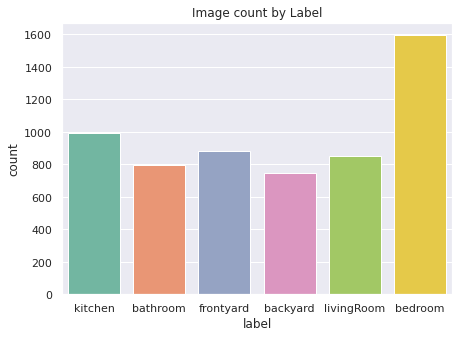

In [ ]:
plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
sns.countplot(data =df, x='label',palette="Set2")
plt.title('Image count by Label')

Text(0.5, 1.0, 'Image type count')

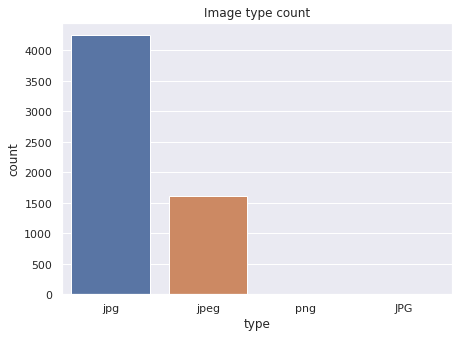

In [ ]:
plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
sns.countplot(data =df, x='type')
plt.title('Image type count')

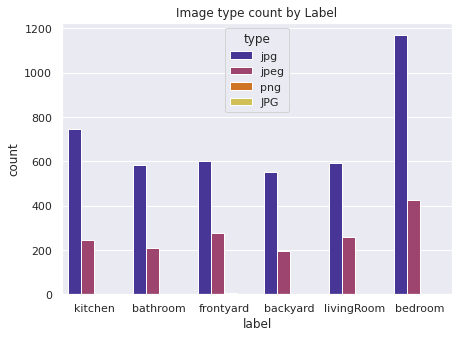

In [ ]:
plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
sns.countplot(data =df, x='label',hue ='type', palette="CMRmap")
plt.title('Image type count by Label')
plt.show()

In [ ]:
# Extracting height and width of images for analysis
height, width = [], []
for image in df['path'].values:
  img = cv2.imread(image)
  height.append(img.shape[0])
  width.append(img.shape[1])

In [ ]:
# Height analysis
for i in range(10,101,10):
  print("{}% images has height {}".format(i,np.percentile(height,i)))

10% images has height 332.0
20% images has height 333.0
30% images has height 373.0
40% images has height 375.0
50% images has height 375.0
60% images has height 375.0
70% images has height 375.0
80% images has height 375.0
90% images has height 375.0
100% images has height 500.0


In [ ]:
# Width analysis
for i in range(10,101,10):
  print("{}% images has width {}".format(i,np.percentile(width,i)))

10% images has width 500.0
20% images has width 500.0
30% images has width 500.0
40% images has width 500.0
50% images has width 500.0
60% images has width 500.0
70% images has width 500.0
80% images has width 500.0
90% images has width 500.0
100% images has width 500.0


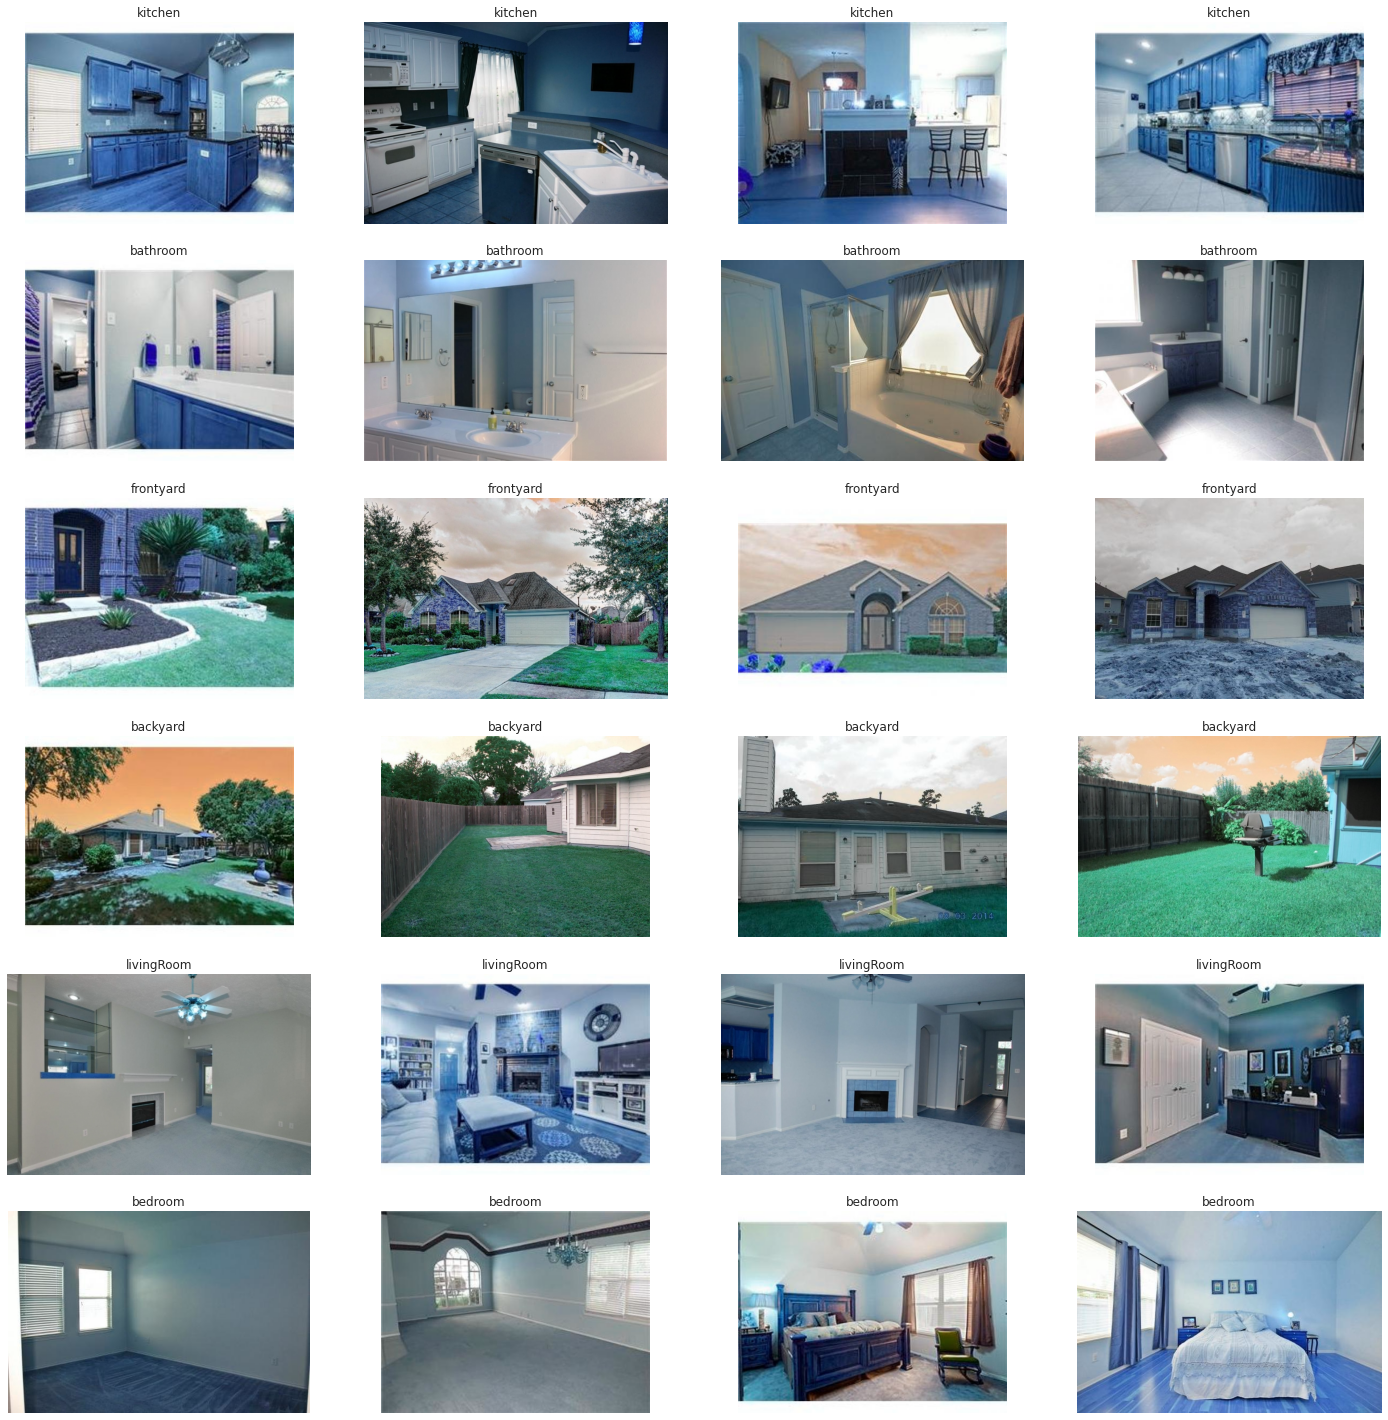

In [ ]:
# visualizing 4 random images from all the classes
fig, ax = plt.subplots(6, 4)
fig.set_size_inches(20,20)
fig.tight_layout()
for i in range(len(ax)):
  row = ax[i]
  label = df['label'].unique()[i]
  temp_df = df[df['label'] == label]
  for col in row:
    num = np.random.randint(0,len(temp_df.values))
    Image = cv2.imread(temp_df.values[num][0])
    col.imshow(Image)
    col.axis('off')
    col.set_title(label)

In [ ]:
# function to applying CLAHE on images 
def enhance(image,limit):
  '''
  This function will return enhanced(CLAHE) image
  '''
  colorimage = cv2.imread(image)
  #colorimage = cv2.resize(colorimage, (256 ,256))
  # We first create a CLAHE model based on OpenCV
  clahe_model = cv2.createCLAHE(clipLimit=limit, tileGridSize=(8,8))

  # For ease of understanding, we explicitly equalize each channel individually
  colorimage_b = clahe_model.apply(colorimage[:,:,0])
  colorimage_g = clahe_model.apply(colorimage[:,:,1])
  colorimage_r = clahe_model.apply(colorimage[:,:,2])

  # Next we stack our equalized channels back into a single image
  colorimage_clahe = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)

  return colorimage_clahe

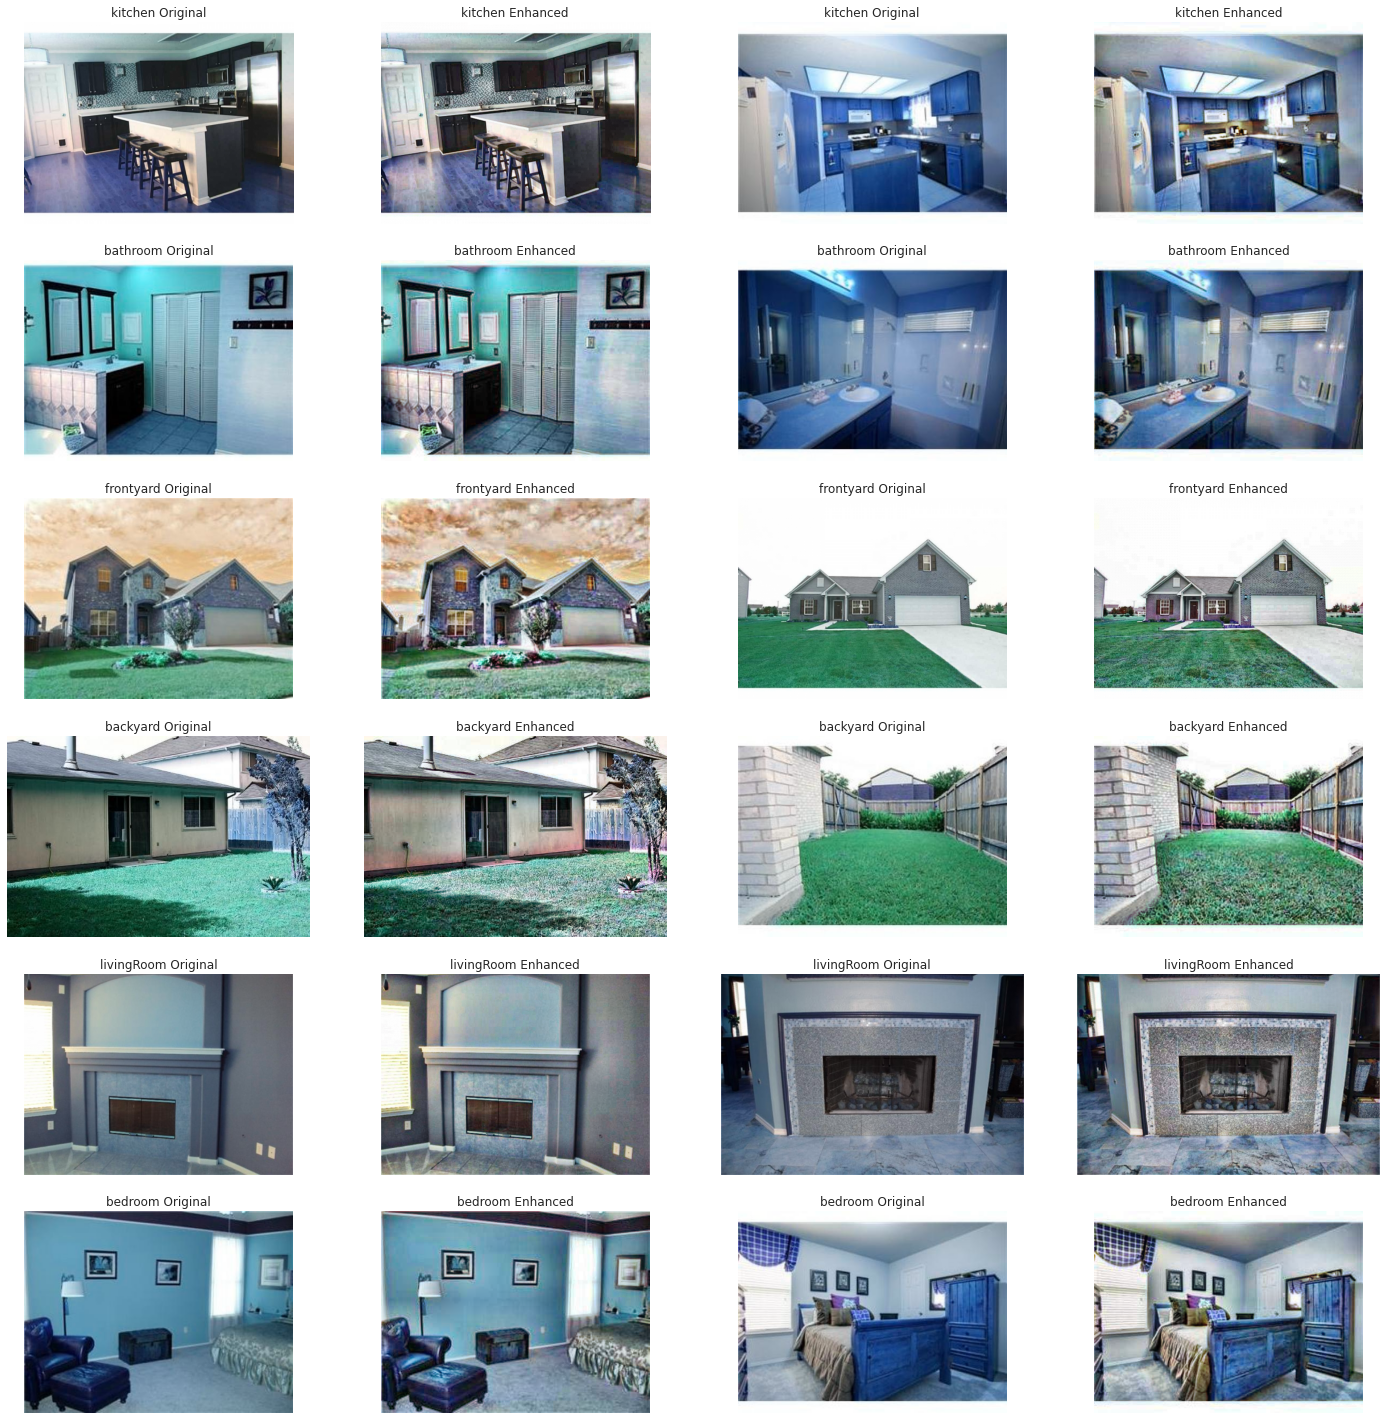

In [ ]:
# side by side comparison of ORIGINAL and Enhanced(CLAHE) iamges
fig, ax = plt.subplots(6, 4)
fig.set_size_inches(20,20)
fig.tight_layout()
for i in range(len(ax)):
  row = ax[i]
  label = df['label'].unique()[i]
  temp_df = df[df['label'] == label]
  for j in range(0,len(row), 2):
    col1= row[j]
    col2= row[j+1]
    num = np.random.randint(0,len(temp_df.values))
    Image = cv2.imread(temp_df.values[num][0])
    col1.imshow(Image)
    col1.axis('off')
    col1.set_title(label+" Original")
    col2.imshow(enhance(temp_df.values[num][0], 2))
    col2.axis('off')
    col2.set_title(label+" Enhanced")